<a href="https://colab.research.google.com/github/ShreyashDhoot/DataQuest/blob/main/DataquestR2final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
df=pd.read_csv('train_data.csv')

In [ ]:
print(len(df))

77444


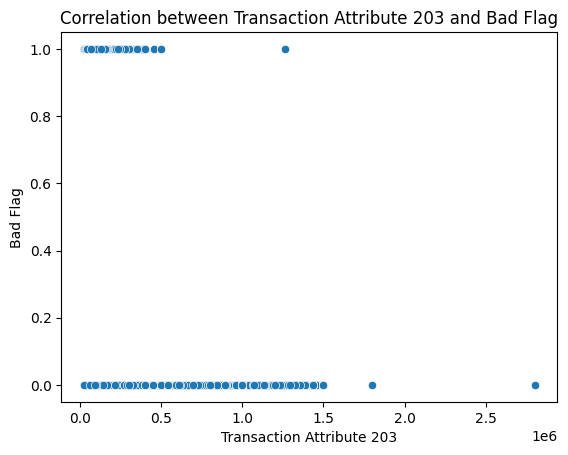

In [ ]:
sns.scatterplot(x=df["onus_attribute_1"], y=df["bad_flag"])
plt.xlabel("Transaction Attribute 203")
plt.ylabel("Bad Flag")
plt.title("Correlation between Transaction Attribute 203 and Bad Flag")
plt.show()

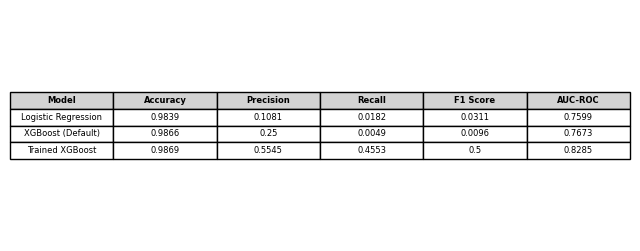

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [
    ["Logistic Regression", 0.9839, 0.1081, 0.0182, 0.0311, 0.7599],
    ["XGBoost (Default)", 0.9866, 0.2500, 0.0049, 0.0096, 0.7673],
    ["Trained XGBoost", 0.9869, 0.5545, 0.4553, 0.5000, 0.8285]
]

columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC"]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data, colLabels=columns, cellLoc='center', loc='center')

# Style the table
for key, cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)
    if key[0] == 0:  # Header row
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#d3d3d3')

plt.savefig("performance_table.png", dpi=300, bbox_inches='tight')
plt.show()

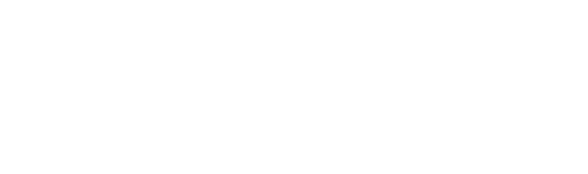

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Define the data
data = {
    "Model": ["Logistic Regression", "XGBoost Default", "Trained XGBoost"],
    "Accuracy": [0.9839, 0.9866, 0.9869],
    "Precision": [0.1081, 0.2500, 0.5545],
    "Recall": [0.0182, 0.0049, 0.4553],
    "F1 Score": [0.0311, 0.0096, 0.5000],
    "AUC-ROC": [0.7599, 0.7673, 0.8285]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis("off")  # Hide axes

# Create table with white text on transparent background
tbl = table(ax, df, loc="center", cellLoc="center", colWidths=[0.2] * len(df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)

# Set cell properties for white text and transparent background
for key, cell in tbl.get_celld().items():
    cell.set_edgecolor("white")
    cell.set_text_props(color="white")
    cell.set_facecolor("none")  # Transparent background

# Save as image with transparent background
fig.patch.set_alpha(0)  # Transparent figure background
plt.savefig("performance_table.png", dpi=300, transparent=True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Assume last column is the target variable
target_column = df.columns[1]
X = df.drop(columns=[target_column])
y = df[target_column]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['bureau_436' 'bureau_447']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Accuracy: 0.9839
Precision: 0.1081
Recall: 0.0182
F1 Score: 0.0311
AUC-ROC: 0.7599


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb

# Handle missing values (fill with median for numerical columns)
df.fillna(df.median(numeric_only=True), inplace=True)

y = df.iloc[:, 1]
X = df.drop(df.columns[1], axis=1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:53:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9866
Precision: 0.2500
Recall: 0.0049
F1 Score: 0.0096
AUC-ROC: 0.7673


In [ ]:
# Handle NaN values with central tendencies
for col in df.columns:
    if df[col].isna().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

<ipython-input-21-54709d3545ec>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


 99%|===================| 77002/77444 [03:06<00:01]       <ipython-input-24-34355cffa05b>:19: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


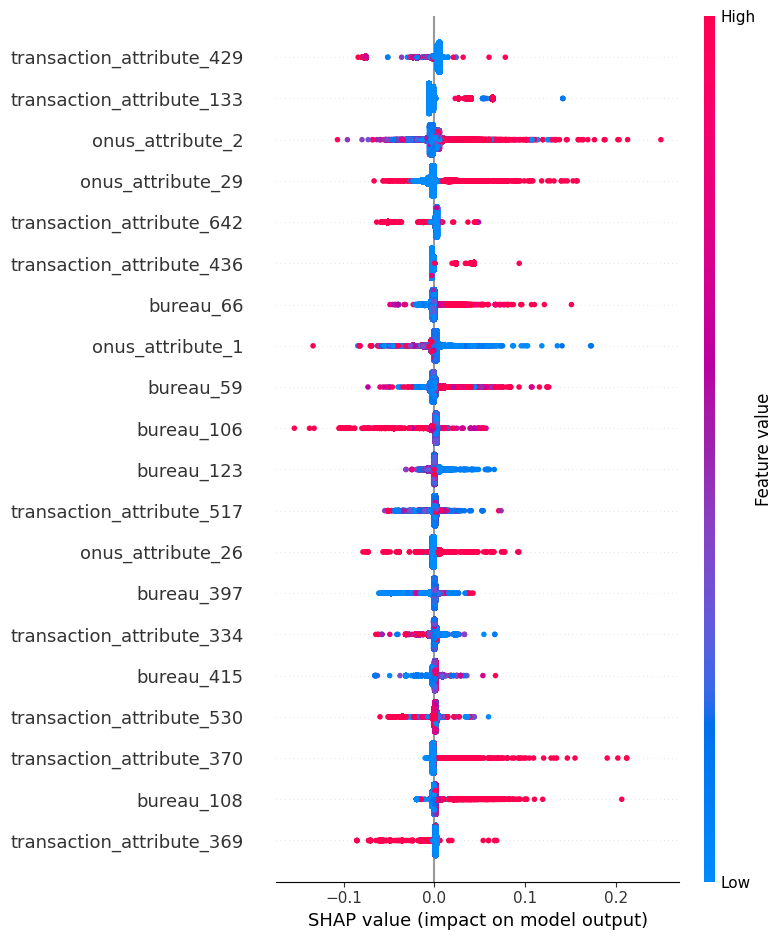

In [ ]:
import shap
import xgboost
import pandas as pd

# Load dataset

X = df.drop(columns=["bad_flag","account_number"])
y = df["bad_flag"]

# Train model (Example: XGBoost)
model = xgboost.XGBRegressor()
model.fit(X, y)

# Create SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Summary plot (visualizes feature importance)
shap.summary_plot(shap_values, X)


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from tqdm import tqdm

target_column = df.columns[1]  # Second column as target
feature_columns = df.drop(columns=[target_column]).columns  # All other columns as features
X = df[feature_columns]
y = df[target_column]

# Store results
results = []

# Loop over all features
for feature in tqdm(feature_columns, desc="Processing Features"):
    X_feature = X[[feature]]  # Convert to DataFrame for sklearn

    # 1. Spearman & Kendall Correlations
    spearman_corr, _ = spearmanr(X_feature.squeeze(), y)
    kendall_corr, _ = kendalltau(X_feature.squeeze(), y)

    # 2. Linear Regression R²
    linear_model = LinearRegression()
    linear_model.fit(X_feature, y)
    y_pred_linear = linear_model.predict(X_feature)
    linear_r2 = r2_score(y, y_pred_linear)

    # 3. Polynomial Regression R² (Degree 3)
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X_feature)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)
    poly_r2 = r2_score(y, y_pred_poly)

    # 4. Decision Tree R²
    tree_model = DecisionTreeRegressor(max_depth=3)
    tree_model.fit(X_feature, y)
    y_pred_tree = tree_model.predict(X_feature)
    tree_r2 = r2_score(y, y_pred_tree)

    # Store results
    results.append({
        "Feature": feature,
        "Spearman": spearman_corr,
        "Kendall": kendall_corr,
        "Linear R²": linear_r2,
        "Polynomial R²": poly_r2,
        "Decision Tree R²": tree_r2,
        "Nonlinearity Score": tree_r2 - linear_r2  # Higher means more nonlinearity
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Sort by Nonlinearity Score
results_df = results_df.sort_values(by="Nonlinearity Score", ascending=False)

# Save results
results_df.to_csv("nonlinearity_results.csv", index=False)

# Display top 10 most nonlinear features
print(results_df.head(10))

Processing Features:  13%|█▎        | 153/1215 [00:10<01:36, 11.02it/s]<ipython-input-22-ad6e2b5a439f>:25: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(X_feature.squeeze(), y)
Processing Features:  16%|█▌        | 191/1215 [00:12<01:00, 17.01it/s]<ipython-input-22-ad6e2b5a439f>:25: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(X_feature.squeeze(), y)
Processing Features:  43%|████▎     | 525/1215 [00:36<01:39,  6.90it/s]<ipython-input-22-ad6e2b5a439f>:25: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(X_feature.squeeze(), y)
Processing Features:  43%|████▎     | 526/1215 [00:36<01:41,  6.77it/s]<ipython-input-22-ad6e2b5a439f>:25: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

  Feature  Spearman   Kendall  Linear R²  Polynomial R²  Decision Tree R²  \
0       X -0.067399 -0.047273   0.004791       0.254308          0.883071   

   Nonlinearity Score  
0             0.87828  


In [ ]:
df.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,47642,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,95032,0,108000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,40510,0,61000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,1.0,0.0,1.0,1.0,1.0
3,51692,0,469000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,27459,0,152000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Define target column
target_col = "bad_flag"

# Split data based on target values
num_1 = int(len(df[df[target_col] == 1]) * 0.45)
num_0 = int(len(df[df[target_col] == 0]) * 0.55)

data_1 = df[df[target_col] == 1].sample(n=num_1, random_state=42)
data_0 = df[df[target_col] == 0].sample(n=num_0, random_state=42)

In [ ]:
# Create training data
train_data = pd.concat([data_1, data_0]).sample(frac=1, random_state=42).reset_index(drop=True)
X_train = train_data.drop(columns=[target_col])
y_train = train_data[target_col]

In [ ]:
# The remaining data will be used as test data
remaining_data = df.drop(train_data.index)
X_test = remaining_data.drop(columns=[target_col])
y_test = remaining_data[target_col]

In [ ]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# Calculate scale_pos_weight (ratio of class 0 to class 1)
num_0 = len(df[df[target_col] == 0])
num_1 = len(df[df[target_col] == 1])
scale_pos_weight = num_0 / num_1  # Penalizes misclassification of fraud cases

In [ ]:
# Train XGBoost with class weighting
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight  # Balances class weights
)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:29:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Get probability predictions
y_prob = model.predict_proba(X_test)[:, 1]

# Adjust threshold for better fraud detection
threshold = 0.35  # Lower threshold to flag more fraud cases
y_pred = (y_prob > threshold).astype(int)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC AUC: {roc_auc:.4f}')

Accuracy: 0.9850
F1 Score: 0.4560
Precision: 0.4661
Recall: 0.4462
Confusion Matrix:
[[34216   252]
 [  273   220]]
ROC AUC: 0.8464


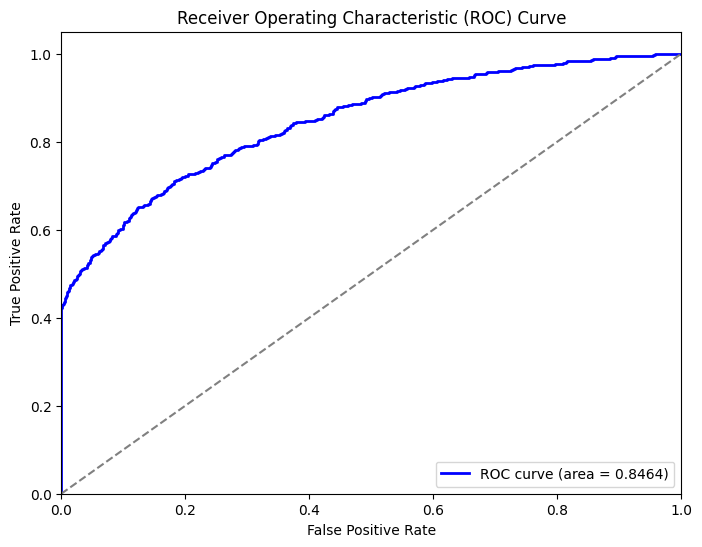

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


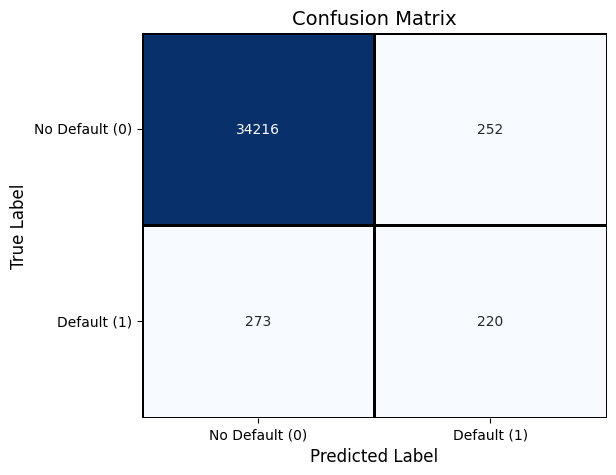

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=2, linecolor='black', cbar=False)

# Labels, title, and formatting
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["No Default (0)", "Default (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["No Default (0)", "Default (1)"], rotation=0)

plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")



Model Accuracy: 0.9850
